In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import timeit
from IPython.display import display, HTML
from IPython.display import Image 
from supervised_learning import *
%matplotlib inline

In [2]:
import sys
from numbers import Number
from collections import Set, Mapping, deque

try: # Python 2
    zero_depth_bases = (basestring, Number, xrange, bytearray)
    iteritems = 'iteritems'
except NameError: # Python 3
    zero_depth_bases = (str, bytes, Number, range, bytearray)
    iteritems = 'items'

def getsize(obj_0):
    """Recursively iterate to sum size of object & members."""
    def inner(obj, _seen_ids = set()):
        obj_id = id(obj)
        if obj_id in _seen_ids:
            return 0
        _seen_ids.add(obj_id)
        size = sys.getsizeof(obj)
        if isinstance(obj, zero_depth_bases):
            pass # bypass remaining control flow and return
        elif isinstance(obj, (tuple, list, Set, deque)):
            size += sum(inner(i) for i in obj)
        elif isinstance(obj, Mapping) or hasattr(obj, iteritems):
            size += sum(inner(k) + inner(v) for k, v in getattr(obj, iteritems)())
        # Check for custom object instances - may subclass above too
        if hasattr(obj, '__dict__'):
            size += inner(vars(obj))
        if hasattr(obj, '__slots__'): # can have __slots__ with __dict__
            size += sum(inner(getattr(obj, s)) for s in obj.__slots__ if hasattr(obj, s))
        return size
    return inner(obj_0)

In [3]:
#df_training, df_testing = loadPhishingDataSet()
#dataset = "Phishing"

df_training, df_testing = loadSpamDataSet()
dataset = "Spam"

In [4]:
df_training.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.0,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,0.0,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.0,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.0,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [5]:
if dataset == "Phishing":
    x_train = df_training.drop("Result",1).values
    y_train = df_training["Result"].values
    x_test = df_testing.drop("Result",1).values
    y_test = df_testing["Result"].values
else:
    x_train = df_training.drop("1",1).values
    y_train = df_training["1"].values
    x_test = df_testing.drop("1",1).values
    y_test = df_testing["1"].values

In [6]:
# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2)


Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py:1750: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `ev

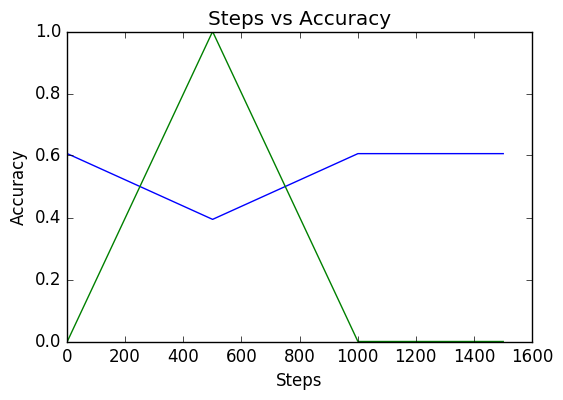

In [10]:
#  Sweep steps to find number needed to converge
training_accuracy = []
testing_accuracy = []

steps = 10

step_range = np.arange(1,2000,500)

for steps in step_range:
    classifier = tf.contrib.learn.DNNClassifier(hidden_units=[1000, 2000, 1000], n_classes=2)
    classifier.fit(x=x_train, y=y_train, steps=steps)
    training_accuracy.append(classifier.evaluate(x=x_train, y=y_train)["accuracy"])
    testing_accuracy.append(classifier.evaluate(x=x_test, y=y_test)["accuracy"])
    
plt.title("Steps vs Accuracy")    
plt.plot(step_range, training_accuracy)
plt.plot(step_range, testing_accuracy)
plt.xlabel("Steps")
plt.ylabel("Accuracy")

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


10
[10, 20, 10]


//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py:1750: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


20
[20, 40, 20]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


30
[30, 60, 30]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


40
[40, 80, 40]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


50
[50, 100, 50]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


60
[60, 120, 60]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


70
[70, 140, 70]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


80
[80, 160, 80]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


90
[90, 180, 90]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


100
[100, 200, 100]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


110
[110, 220, 110]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


120
[120, 240, 120]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


130
[130, 260, 130]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


140
[140, 280, 140]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


150
[150, 300, 150]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


160
[160, 320, 160]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


170
[170, 340, 170]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


180
[180, 360, 180]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


190
[190, 380, 190]


Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(

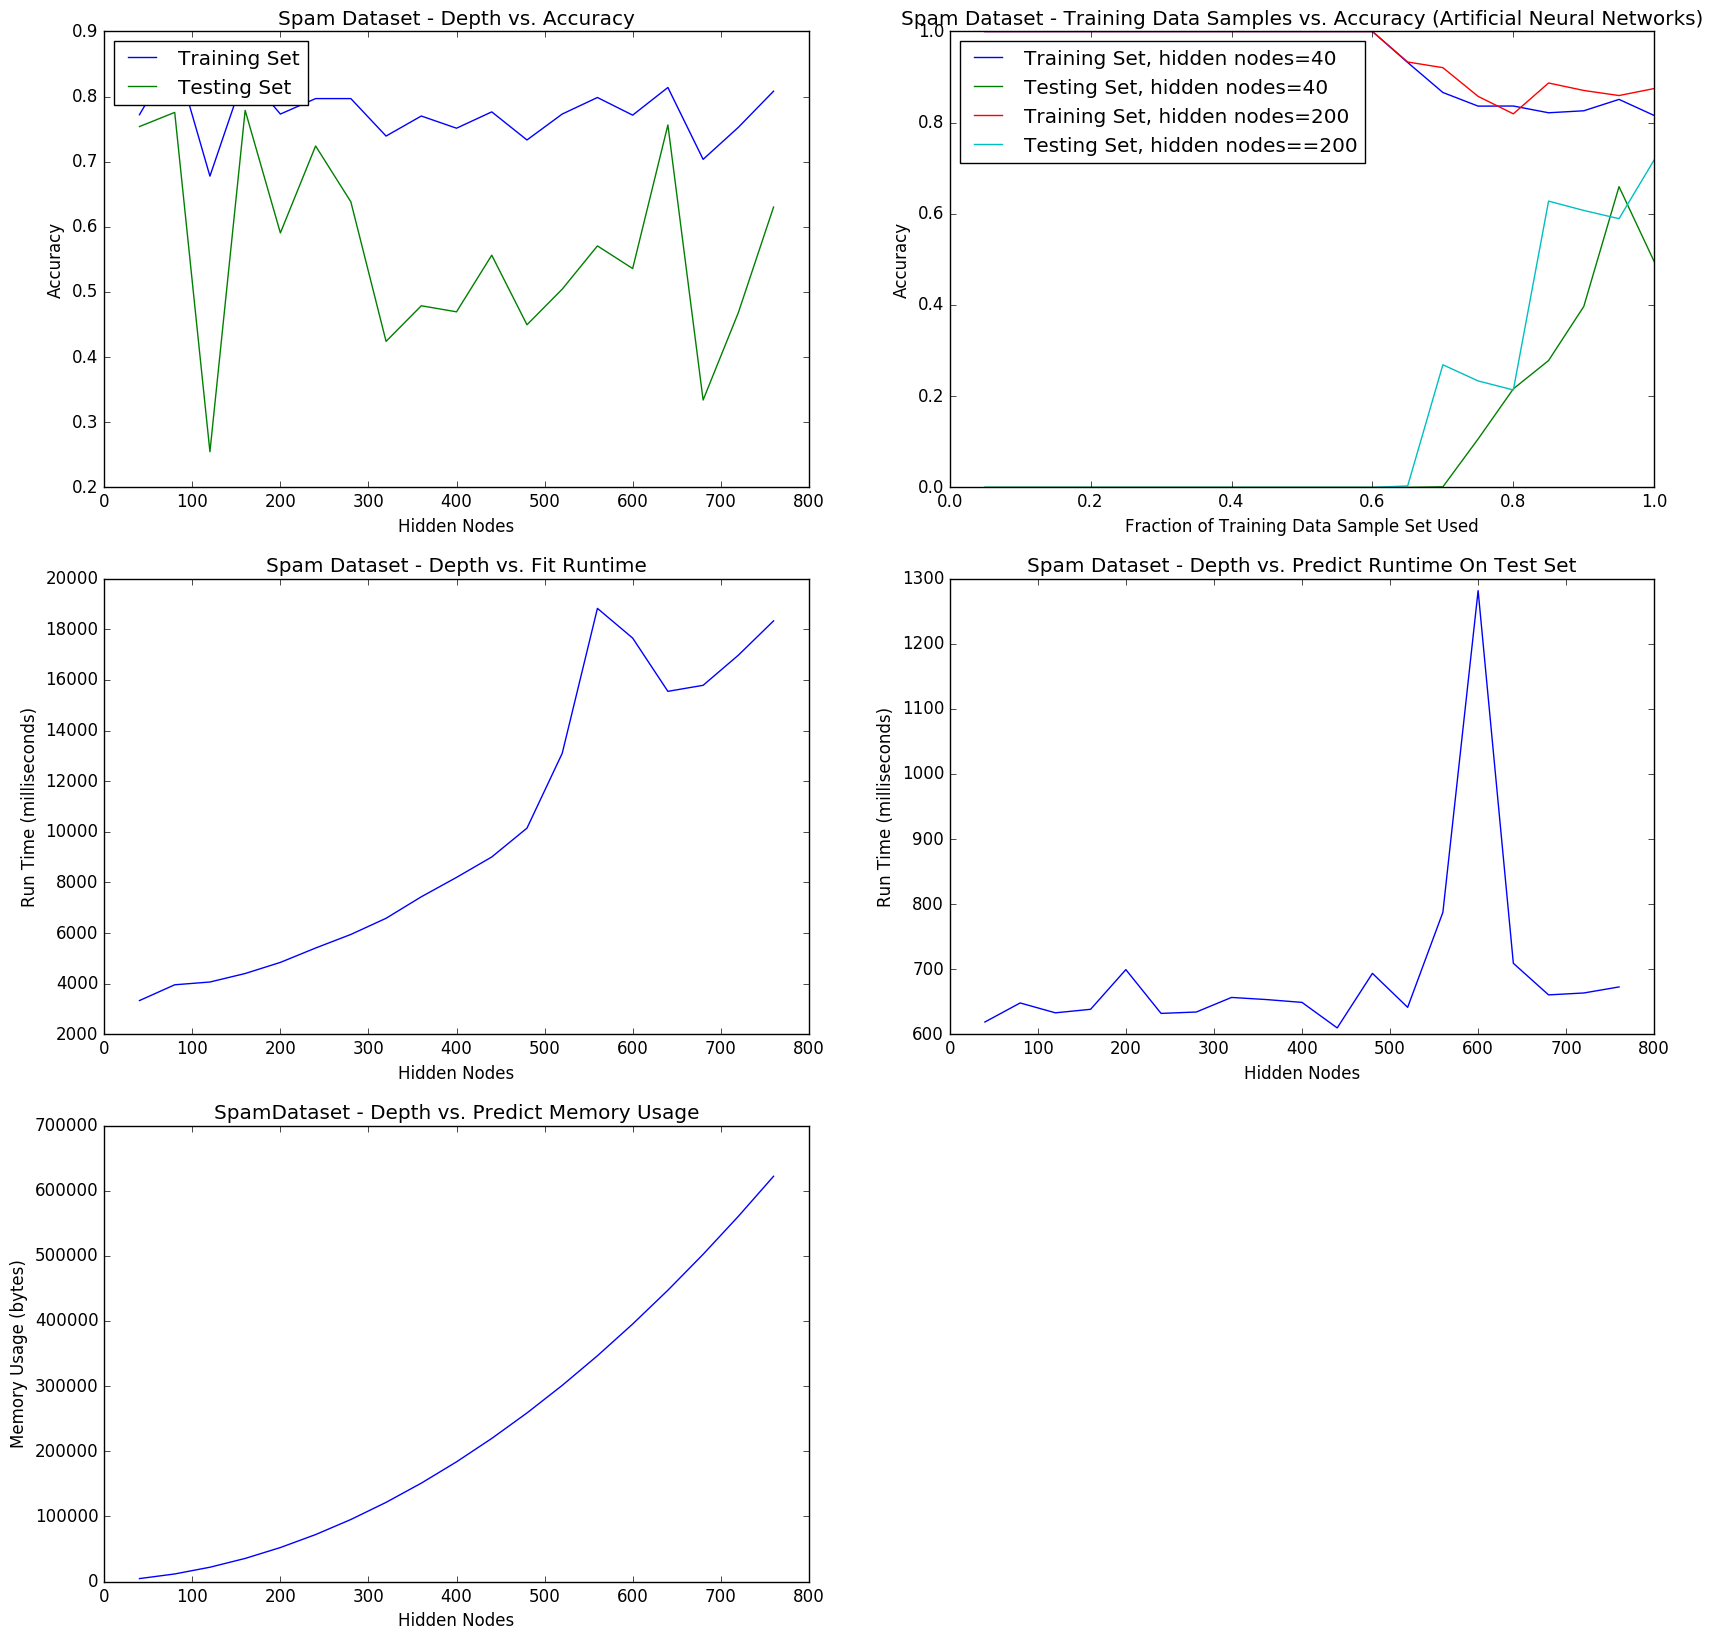

In [8]:
#  Model complexity sweep
training_accuracy = []
testing_accuracy = []
memory_usage = []
fit_run_time = []
predict_run_time = []

node_range = np.arange(10,200,10)

steps = 200

for nodes in node_range:
    print(nodes)
    hidden_units = [int(nodes), int(nodes*2), int(nodes)]
    print(hidden_units)
    classifier = tf.contrib.learn.DNNClassifier(hidden_units=hidden_units, n_classes=2)
    classifier.fit(x=x_train, y=y_train, steps=200)
    training_accuracy.append(classifier.evaluate(x=x_train, y=y_train)["accuracy"])
    testing_accuracy.append(classifier.evaluate(x=x_test, y=y_test)["accuracy"])

    memory_usage.append(getsize(classifier.weights_))

    fit_run_time.append(timeit.timeit("classifier.fit(x=x_train, y=y_train, steps=steps)", 
                    "from __main__ import classifier, x_train, y_train, steps",
                     number = 1))

    predict_run_time.append(timeit.timeit("classifier.evaluate(x=x_train, y=y_train)", 
                    "from __main__ import classifier, x_train, y_train",
                     number = 1))
    
plt.rcParams.update({'font.size': 12})    
fig = plt.figure(figsize=(20,20))    
    
plt.subplot(321)
plt.plot(node_range*4, training_accuracy)
plt.plot(node_range*4, testing_accuracy)
plt.title(dataset + " Dataset - Depth vs. Accuracy")
plt.xlabel("Hidden Nodes")
plt.ylabel("Accuracy")
plt.legend(["Training Set", "Testing Set"], loc=2)

plt.subplot(323)
plt.title(dataset + " Dataset - Depth vs. Fit Runtime")
plt.plot(node_range*4, np.array(fit_run_time) * 1000)
plt.ylabel("Run Time (milliseconds)")
plt.xlabel("Hidden Nodes")

plt.subplot(324)
plt.title(dataset + " Dataset - Depth vs. Predict Runtime On Test Set")
plt.plot(node_range*4, np.array(predict_run_time) * 1000)
plt.ylabel("Run Time (milliseconds)")
plt.xlabel("Hidden Nodes")

plt.subplot(325)
plt.title(dataset + "Dataset - Depth vs. Predict Memory Usage")
plt.plot(node_range*4, memory_usage)
plt.ylabel("Memory Usage (bytes)")
plt.xlabel("Hidden Nodes")

training_accuracy = []
testing_accuracy = []

percent_of_training_data = np.arange(.05,1.05,.05)
for nodes in [10, 50]:
    new_training_accuracy = []
    new_testing_accuracy = []
    for percent in percent_of_training_data:
        hidden_units = [int(nodes), int(nodes*2), int(nodes)]
        classifier = tf.contrib.learn.DNNClassifier(hidden_units=hidden_units, n_classes=2)
        
        classifier.fit(x=x_train[0:int(percent * len(x_train))],
                       y=y_train[0:int(percent * len(x_train))],
                      steps=400)
 
        new_training_accuracy.append(classifier.evaluate(x=x_train[0:int(percent * len(x_train))], 
                                                         y=y_train[0:int(percent * len(x_train))])["accuracy"])
        new_testing_accuracy.append(classifier.evaluate(x=x_test, y=y_test)["accuracy"])
        
    training_accuracy.append(new_training_accuracy)
    testing_accuracy.append(new_testing_accuracy)

plt.subplot(322)
#plt.figure()
plt.plot(percent_of_training_data, training_accuracy[0])
plt.plot(percent_of_training_data, testing_accuracy[0])
plt.plot(percent_of_training_data, training_accuracy[1])
plt.plot(percent_of_training_data, testing_accuracy[1])
plt.title(dataset + " Dataset - Training Data Samples vs. Accuracy (Artificial Neural Networks)")
plt.xlabel("Fraction of Training Data Sample Set Used")
plt.ylabel("Accuracy")
plt.legend(["Training Set, hidden nodes=40", "Testing Set, hidden nodes=40",
           "Training Set, hidden nodes=200", "Testing Set, hidden nodes==200"], loc=2)

In [9]:
df_results = pd.DataFrame()
df_results["Algorithm"] = ["ANN hidden nodes=40", "ANN hidden nodes=200"]
df_results["Training Set Accuracy"] = [training_accuracy[0][-1], training_accuracy[1][-1]]
df_results["Testing Set Accuracy"] = [testing_accuracy[0][-1], testing_accuracy[1][-1]]
df_results["Fit Runtime (ms)"] = [fit_run_time[0]*1000, fit_run_time[1]*1000]
df_results["Predict Runtime (ms)"] = [predict_run_time[0]*1000, predict_run_time[1]*1000]
df_results["Memory Usage (bytes)"] = [memory_usage[0], memory_usage[1]]
display(HTML(df_results.to_html(index=False)))

Algorithm,Training Set Accuracy,Testing Set Accuracy,Fit Runtime (ms),Predict Runtime (ms),Memory Usage (bytes)
ANN hidden nodes=40,0.815719,0.495031,3337.762501,619.120670,4464
ANN hidden nodes=200,0.874916,0.718634,3960.633452,648.343136,11584
